In [1]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

**Yêu cầu.** Từ một đồng xu có xác suất ra ngửa là $p$ $(0 < p < 1)$. Ta không biết giá trị của $p$, tìm cách sinh một biến cố có xác suất là 50%.

In [2]:
def tung_dong_xu():
    p = 0.7 # unknown
    return random.choices([0, 1], [1 - p, p])[0]

def tan_xuat(e, N):
    return sum(e() for _ in range(N))/N

tan_xuat(tung_dong_xu, 10000)

0.6988

**Trả lời.** Ta có thể sinh một biến cố có xác suất là 50% bằng thủ tục sau

> *Bước 1.* Tung đồng xu 2 lần, gọi $m_1, m_2$ lần lượt là mặt ra của đồng xu ở lần 1, lần 2.
>
> *Bước 2.* Lặp lại Bước 1 cho đến khi $m_1 \neq m_2$.
>
> *Bước 3.* Trả về biến cố "$m_1$ là ngửa".

In [3]:
def tung_dong_xu_can_bang():
    while True:
        a = []
        for _ in range(4):
            a.append(tung_dong_xu())
            
        if sum(a) == 1:
            break
    return a[0]

tan_xuat(tung_dong_xu_can_bang, 100000)

0.24999

### Thuật toán LCG

In [4]:
# Algorithm LCG
# Input:
#   N (output sequence length)
#   m > 1 (modulus)
#   a ∈ {1, 2, . . . , m − 1} (multiplier)
#   c ∈ {0, 1, . . . , m − 1} (increment)
#   X0 ∈ {0, 1, . . . , m − 1} (seed)
# Output: a sequence X1, X2, X3, . . . of pseudo random numbers
def LCG(N, m, a, c, X0=0):
    X = np.zeros((N,), dtype="int64")
    Xn = X0
    for n in range(N):
        Xn = (a*Xn + c) % m
        X[n] = Xn
    return X

In [5]:
N = 10**5

x = [None for _ in range(4)]
x[0] = LCG(N, m=2**35, a=2**7, c=1)/2**35
x[1] = LCG(N, m=2**32, a=69069, c=1327217885)/2**32
x[2] = LCG(N, m=2**31, a=2**16 + 3, c=0)/2**31
x[3] = np.random.uniform(size=N)

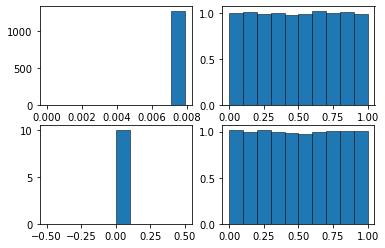

In [6]:
# histogram
fig, _ = plt.subplots(2, 2)
for xi, ax in zip(x, fig.get_axes()):
    ax.hist(xi, density=True, edgecolor="black", linewidth=0.5)

#plt.tight_layout()
#plt.savefig('PRNG_hist.pdf')

plt.show()